<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [19]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  29.488083   761.416336  0.875195  6.195815  1.412309
1  66.000920  1273.391041  0.916602  8.778791  1.543673
2  71.282891   337.919578  0.140146  5.544917  0.667563
3   7.865466   261.614616  0.612830  3.786023  1.607480
4  39.454051   358.977506  0.138920  2.024349  0.747411


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0038131	total: 60.2ms	remaining: 1m
1:	learn: 0.9931715	total: 61.1ms	remaining: 30.5s
2:	learn: 0.9818389	total: 61.6ms	remaining: 20.5s
3:	learn: 0.9709568	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9591371	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9476932	total: 64.7ms	remaining: 10.7s
6:	learn: 0.9352778	total: 65.2ms	remaining: 9.25s
7:	learn: 0.9234490	total: 68.5ms	remaining: 8.5s
8:	learn: 0.9111156	total: 69.7ms	remaining: 7.67s
9:	learn: 0.9001577	total: 70.6ms	remaining: 6.99s
10:	learn: 0.8911174	total: 71.6ms	remaining: 6.44s
11:	learn: 0.8815212	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8697514	total: 74.7ms	remaining: 5.67s
13:	learn: 0.8596483	total: 75.1ms	remaining: 5.29s
14:	learn: 0.8487685	total: 75.6ms	remaining: 4.97s
15:	learn: 0.8399215	total: 76.3ms	remaining: 4.69s
16:	learn: 0.8308574	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8216356	total: 79.8ms	remaining: 4.35s
18:	learn: 0.8142162	total: 80.9ms	remaining: 4.1

73:	learn: 0.4609580	total: 126ms	remaining: 1.57s
74:	learn: 0.4570508	total: 127ms	remaining: 1.56s
75:	learn: 0.4523035	total: 128ms	remaining: 1.56s
76:	learn: 0.4480491	total: 129ms	remaining: 1.54s
77:	learn: 0.4445708	total: 129ms	remaining: 1.53s
78:	learn: 0.4412884	total: 130ms	remaining: 1.52s
79:	learn: 0.4371485	total: 131ms	remaining: 1.5s
80:	learn: 0.4335868	total: 131ms	remaining: 1.49s
81:	learn: 0.4310112	total: 132ms	remaining: 1.48s
82:	learn: 0.4274140	total: 134ms	remaining: 1.48s
83:	learn: 0.4241380	total: 134ms	remaining: 1.46s
84:	learn: 0.4209732	total: 139ms	remaining: 1.49s
85:	learn: 0.4177939	total: 139ms	remaining: 1.48s
86:	learn: 0.4145663	total: 139ms	remaining: 1.46s
87:	learn: 0.4121563	total: 140ms	remaining: 1.45s
88:	learn: 0.4087139	total: 141ms	remaining: 1.44s
89:	learn: 0.4054968	total: 142ms	remaining: 1.43s
90:	learn: 0.4020367	total: 143ms	remaining: 1.43s
91:	learn: 0.3996499	total: 144ms	remaining: 1.42s
92:	learn: 0.3960927	total: 144m

144:	learn: 0.2756318	total: 209ms	remaining: 1.23s
145:	learn: 0.2740708	total: 210ms	remaining: 1.23s
146:	learn: 0.2720946	total: 214ms	remaining: 1.24s
147:	learn: 0.2702659	total: 214ms	remaining: 1.23s
148:	learn: 0.2686858	total: 215ms	remaining: 1.23s
149:	learn: 0.2672118	total: 215ms	remaining: 1.22s
150:	learn: 0.2655513	total: 216ms	remaining: 1.21s
151:	learn: 0.2635769	total: 216ms	remaining: 1.21s
152:	learn: 0.2617889	total: 218ms	remaining: 1.21s
153:	learn: 0.2605759	total: 219ms	remaining: 1.2s
154:	learn: 0.2590329	total: 221ms	remaining: 1.21s
155:	learn: 0.2574548	total: 222ms	remaining: 1.2s
156:	learn: 0.2559545	total: 223ms	remaining: 1.2s
157:	learn: 0.2539342	total: 223ms	remaining: 1.19s
158:	learn: 0.2526088	total: 224ms	remaining: 1.18s
159:	learn: 0.2512359	total: 226ms	remaining: 1.19s
160:	learn: 0.2498976	total: 227ms	remaining: 1.18s
161:	learn: 0.2483985	total: 227ms	remaining: 1.18s
162:	learn: 0.2463925	total: 228ms	remaining: 1.17s
163:	learn: 0.2

241:	learn: 0.1610494	total: 343ms	remaining: 1.07s
242:	learn: 0.1604543	total: 344ms	remaining: 1.07s
243:	learn: 0.1598094	total: 344ms	remaining: 1.07s
244:	learn: 0.1590585	total: 347ms	remaining: 1.07s
245:	learn: 0.1586742	total: 348ms	remaining: 1.07s
246:	learn: 0.1580137	total: 349ms	remaining: 1.06s
247:	learn: 0.1572433	total: 350ms	remaining: 1.06s
248:	learn: 0.1567590	total: 351ms	remaining: 1.06s
249:	learn: 0.1564075	total: 352ms	remaining: 1.05s
250:	learn: 0.1556051	total: 353ms	remaining: 1.05s
251:	learn: 0.1548943	total: 355ms	remaining: 1.05s
252:	learn: 0.1541872	total: 357ms	remaining: 1.05s
253:	learn: 0.1536559	total: 359ms	remaining: 1.05s
254:	learn: 0.1530933	total: 360ms	remaining: 1.05s
255:	learn: 0.1525974	total: 361ms	remaining: 1.05s
256:	learn: 0.1520540	total: 361ms	remaining: 1.04s
257:	learn: 0.1514036	total: 362ms	remaining: 1.04s
258:	learn: 0.1508182	total: 364ms	remaining: 1.04s
259:	learn: 0.1502784	total: 365ms	remaining: 1.04s
260:	learn: 

285:	learn: 0.1363736	total: 429ms	remaining: 1.07s
286:	learn: 0.1357639	total: 429ms	remaining: 1.07s
287:	learn: 0.1353093	total: 431ms	remaining: 1.06s
288:	learn: 0.1346879	total: 432ms	remaining: 1.06s
289:	learn: 0.1343642	total: 432ms	remaining: 1.06s
290:	learn: 0.1337847	total: 432ms	remaining: 1.05s
291:	learn: 0.1334386	total: 435ms	remaining: 1.05s
292:	learn: 0.1328663	total: 436ms	remaining: 1.05s
293:	learn: 0.1324439	total: 436ms	remaining: 1.05s
294:	learn: 0.1315603	total: 437ms	remaining: 1.04s
295:	learn: 0.1310134	total: 437ms	remaining: 1.04s
296:	learn: 0.1303615	total: 437ms	remaining: 1.03s
297:	learn: 0.1298991	total: 441ms	remaining: 1.04s
298:	learn: 0.1295456	total: 441ms	remaining: 1.03s
299:	learn: 0.1289113	total: 442ms	remaining: 1.03s
300:	learn: 0.1286193	total: 442ms	remaining: 1.03s
301:	learn: 0.1282420	total: 442ms	remaining: 1.02s
302:	learn: 0.1279385	total: 446ms	remaining: 1.03s
303:	learn: 0.1275291	total: 447ms	remaining: 1.02s
304:	learn: 

370:	learn: 0.0998637	total: 531ms	remaining: 900ms
371:	learn: 0.0991300	total: 531ms	remaining: 897ms
372:	learn: 0.0984130	total: 532ms	remaining: 894ms
373:	learn: 0.0980030	total: 537ms	remaining: 899ms
374:	learn: 0.0973066	total: 537ms	remaining: 896ms
375:	learn: 0.0969100	total: 538ms	remaining: 893ms
376:	learn: 0.0961451	total: 539ms	remaining: 890ms
377:	learn: 0.0957905	total: 539ms	remaining: 887ms
378:	learn: 0.0954077	total: 545ms	remaining: 893ms
379:	learn: 0.0951146	total: 546ms	remaining: 891ms
380:	learn: 0.0943953	total: 546ms	remaining: 888ms
381:	learn: 0.0940822	total: 547ms	remaining: 885ms
382:	learn: 0.0937471	total: 548ms	remaining: 883ms
383:	learn: 0.0933818	total: 549ms	remaining: 881ms
384:	learn: 0.0931047	total: 550ms	remaining: 879ms
385:	learn: 0.0927569	total: 551ms	remaining: 877ms
386:	learn: 0.0924386	total: 552ms	remaining: 875ms
387:	learn: 0.0920167	total: 553ms	remaining: 872ms
388:	learn: 0.0916796	total: 553ms	remaining: 869ms
389:	learn: 

459:	learn: 0.0730472	total: 638ms	remaining: 749ms
460:	learn: 0.0727293	total: 639ms	remaining: 747ms
461:	learn: 0.0722936	total: 641ms	remaining: 746ms
462:	learn: 0.0720445	total: 645ms	remaining: 748ms
463:	learn: 0.0719015	total: 648ms	remaining: 748ms
464:	learn: 0.0718194	total: 649ms	remaining: 746ms
465:	learn: 0.0715198	total: 649ms	remaining: 744ms
466:	learn: 0.0713958	total: 653ms	remaining: 745ms
467:	learn: 0.0713205	total: 654ms	remaining: 743ms
468:	learn: 0.0709152	total: 654ms	remaining: 741ms
469:	learn: 0.0706856	total: 667ms	remaining: 752ms
470:	learn: 0.0705909	total: 667ms	remaining: 750ms
471:	learn: 0.0702967	total: 668ms	remaining: 747ms
472:	learn: 0.0702049	total: 668ms	remaining: 745ms
473:	learn: 0.0700755	total: 669ms	remaining: 742ms
474:	learn: 0.0697419	total: 669ms	remaining: 740ms
475:	learn: 0.0695195	total: 670ms	remaining: 737ms
476:	learn: 0.0693884	total: 670ms	remaining: 735ms
477:	learn: 0.0691701	total: 671ms	remaining: 732ms
478:	learn: 

498:	learn: 0.0644544	total: 692ms	remaining: 695ms
499:	learn: 0.0643701	total: 693ms	remaining: 693ms
500:	learn: 0.0641500	total: 694ms	remaining: 691ms
501:	learn: 0.0639069	total: 696ms	remaining: 691ms
502:	learn: 0.0637051	total: 697ms	remaining: 689ms
503:	learn: 0.0634740	total: 697ms	remaining: 686ms
504:	learn: 0.0632183	total: 698ms	remaining: 684ms
505:	learn: 0.0629899	total: 699ms	remaining: 683ms
506:	learn: 0.0627404	total: 700ms	remaining: 680ms
507:	learn: 0.0625199	total: 701ms	remaining: 679ms
508:	learn: 0.0623059	total: 703ms	remaining: 678ms
509:	learn: 0.0621431	total: 704ms	remaining: 676ms
510:	learn: 0.0619844	total: 705ms	remaining: 675ms
511:	learn: 0.0617982	total: 706ms	remaining: 673ms
512:	learn: 0.0616200	total: 708ms	remaining: 672ms
513:	learn: 0.0614961	total: 708ms	remaining: 670ms
514:	learn: 0.0614175	total: 709ms	remaining: 668ms
515:	learn: 0.0612382	total: 709ms	remaining: 665ms
516:	learn: 0.0611362	total: 710ms	remaining: 663ms
517:	learn: 

689:	learn: 0.0399605	total: 817ms	remaining: 367ms
690:	learn: 0.0399332	total: 817ms	remaining: 365ms
691:	learn: 0.0397766	total: 817ms	remaining: 364ms
692:	learn: 0.0396637	total: 818ms	remaining: 362ms
693:	learn: 0.0395532	total: 818ms	remaining: 361ms
694:	learn: 0.0394452	total: 819ms	remaining: 359ms
695:	learn: 0.0394074	total: 821ms	remaining: 359ms
696:	learn: 0.0393539	total: 822ms	remaining: 358ms
697:	learn: 0.0393277	total: 824ms	remaining: 357ms
698:	learn: 0.0392374	total: 825ms	remaining: 355ms
699:	learn: 0.0391908	total: 825ms	remaining: 354ms
700:	learn: 0.0391586	total: 825ms	remaining: 352ms
701:	learn: 0.0390707	total: 826ms	remaining: 351ms
702:	learn: 0.0390249	total: 826ms	remaining: 349ms
703:	learn: 0.0390043	total: 827ms	remaining: 348ms
704:	learn: 0.0389840	total: 827ms	remaining: 346ms
705:	learn: 0.0387170	total: 828ms	remaining: 345ms
706:	learn: 0.0386478	total: 828ms	remaining: 343ms
707:	learn: 0.0386279	total: 829ms	remaining: 342ms
708:	learn: 

840:	learn: 0.0262795	total: 943ms	remaining: 178ms
841:	learn: 0.0262400	total: 945ms	remaining: 177ms
842:	learn: 0.0262074	total: 946ms	remaining: 176ms
843:	learn: 0.0260860	total: 946ms	remaining: 175ms
844:	learn: 0.0260275	total: 947ms	remaining: 174ms
845:	learn: 0.0259460	total: 947ms	remaining: 172ms
846:	learn: 0.0259071	total: 947ms	remaining: 171ms
847:	learn: 0.0258752	total: 948ms	remaining: 170ms
848:	learn: 0.0257442	total: 949ms	remaining: 169ms
849:	learn: 0.0257130	total: 950ms	remaining: 168ms
850:	learn: 0.0255964	total: 950ms	remaining: 166ms
851:	learn: 0.0255589	total: 950ms	remaining: 165ms
852:	learn: 0.0254451	total: 951ms	remaining: 164ms
853:	learn: 0.0254085	total: 951ms	remaining: 163ms
854:	learn: 0.0253603	total: 952ms	remaining: 161ms
855:	learn: 0.0252810	total: 952ms	remaining: 160ms
856:	learn: 0.0252450	total: 953ms	remaining: 159ms
857:	learn: 0.0252149	total: 953ms	remaining: 158ms
858:	learn: 0.0251852	total: 953ms	remaining: 157ms
859:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.29914966684897293


ABC Pre-generator MAE 1.0517645737111176


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

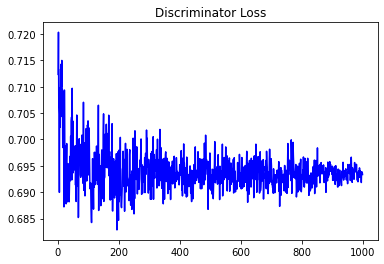

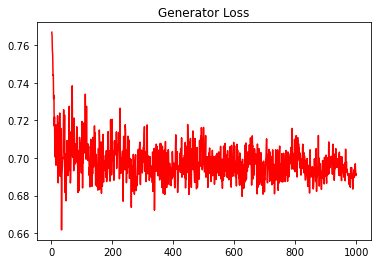

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5649267083751037


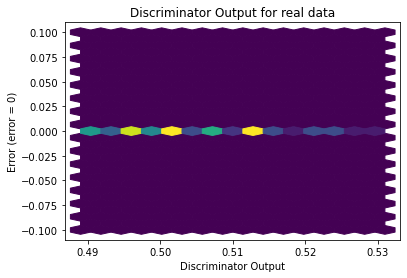

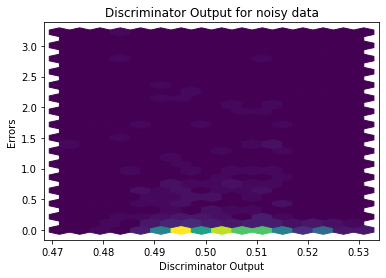

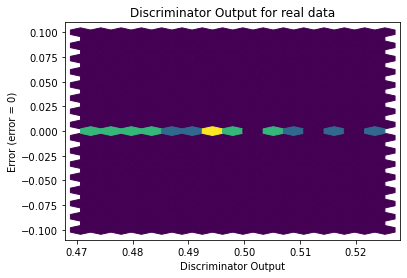

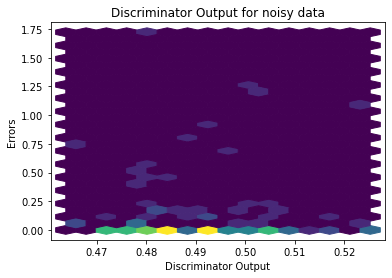

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

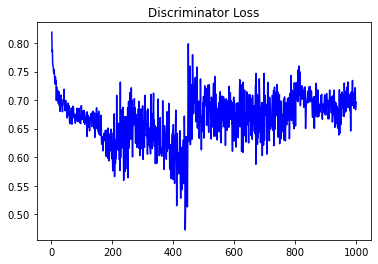

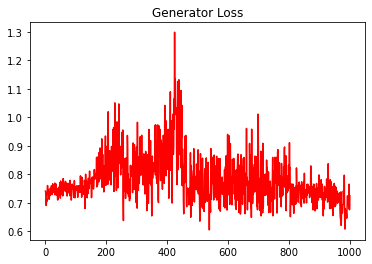

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
2.0090485407710075


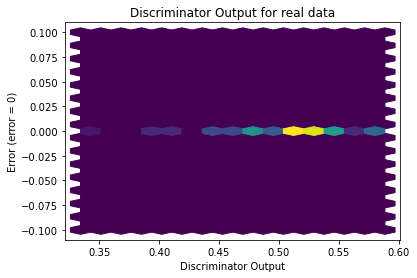

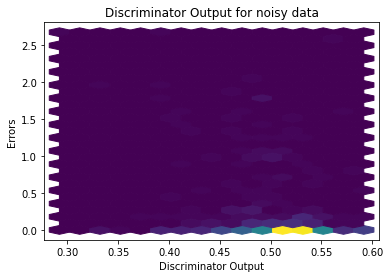

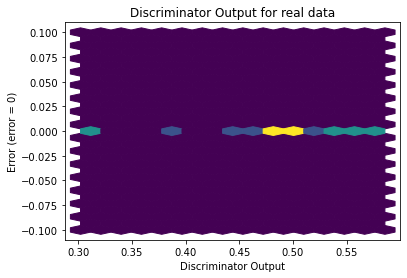

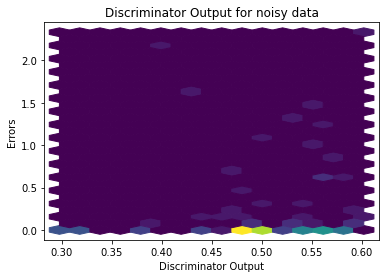

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabNet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


AttributeError: module 'network' has no attribute 'DiscriminatorTabNet'

In [ ]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


In [ ]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())